In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [34]:
def rmse(y_act,y_pred):
    rms=sqrt(mean_squared_error(y_act,y_pred))
    return rms

In [35]:
train = pd.read_csv('Data/train_data_hhp.csv')
test = pd.read_csv('Data/test_data_hhp.csv')

train,validation=train_test_split(train,test_size=0.3,random_state=0)

year_2_data = pd.read_csv('Data/train_data_hhp.csv')
year_2_data.drop(['DaysInHospital','Year','ClaimsTruncated','MemberID'],axis=1, inplace=True)

Ytrain=train['DaysInHospital']
Ytest=test['DaysInHospital']#, axis=1, inplace=True)
Yvalidation=validation['DaysInHospital']


train.drop(['DaysInHospital','Year','ClaimsTruncated','MemberID'],axis=1, inplace=True)
test.drop(['DaysInHospital','Year','ClaimsTruncated','MemberID'],axis=1, inplace=True)
validation.drop(['DaysInHospital','Year','ClaimsTruncated','MemberID'],axis=1, inplace=True)

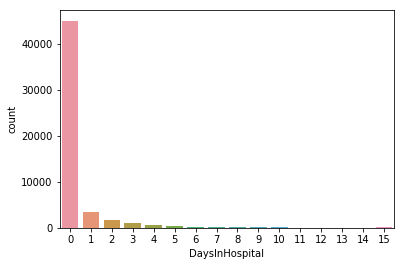

In [36]:
import seaborn as sns
sns.countplot(Ytrain)

### Scale input

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

col_name=train.columns

year_2_data_scaled = sc.fit_transform(year_2_data)

X_train_scaled = sc.fit_transform(train)
X_test_scaled = sc.fit_transform(test)
X_validation_scaled = sc.fit_transform(validation)

year_2_data_scaled = pd.DataFrame(year_2_data_scaled , columns = col_name)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = col_name)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = col_name)
X_validation_scaled = pd.DataFrame(X_validation_scaled, columns = col_name)

X_train_scaled.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age_05,age_15,age_25,age_35,age_45,age_55,age_65,age_75,age_85,age_MISS,...,DrugCountMin,DrugCountMax,DrugCountMean,DrugCount,labCount_min,labCount_max,labCount_ave,labcount_months,labNull,drugNull
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.142857,0.285714,0.250000,1.000000,0.0,0.0,0.00,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.285714,0.714286,0.500000,0.166667,0.2,0.2,0.20,0.083333,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.2,0.5,0.35,0.166667,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.7,0.7,0.70,0.083333,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.142857,0.142857,0.166667,0.0,0.0,0.00,0.000000,0.0,0.0


### Convert output by log scale


In [38]:
logYtrain=np.log(Ytrain+1)
logYtest=np.log(Ytest+1)
logYvalidation=np.log(Yvalidation+1)

In [39]:
XGregr = XGBRegressor()

In [40]:
XGregr.fit(X_train_scaled, logYtrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [41]:
logY_pred_test = XGregr .predict(X_test_scaled)
logY_pred_train = XGregr .predict(X_train_scaled)
logY_pred_validation = XGregr .predict(X_validation_scaled)

#truncated output
logY_pred_test[logY_pred_test < 0]=0
logY_pred_train[logY_pred_train < 0]=0
logY_pred_validation[logY_pred_validation < 0]=0

print('error on training set: ', rmse(logYtrain, logY_pred_train),
     'error on validation set: ', rmse(logYvalidation, logY_pred_validation),
      'error on testing set: ', rmse(logYtest, logY_pred_test)
    )

error on training set:  0.45011941164603225 error on validation set:  0.46422230753689536 error on testing set:  0.44895895314663226


## Feature selection

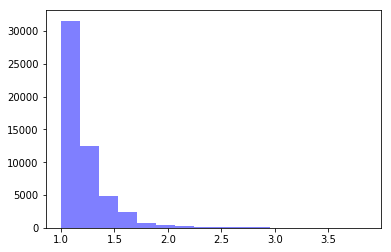

In [42]:
num_bins=16
n, bins, patches = plt.hist(np.exp(logY_pred_train), num_bins, facecolor='blue', alpha=0.5)
plt.show()

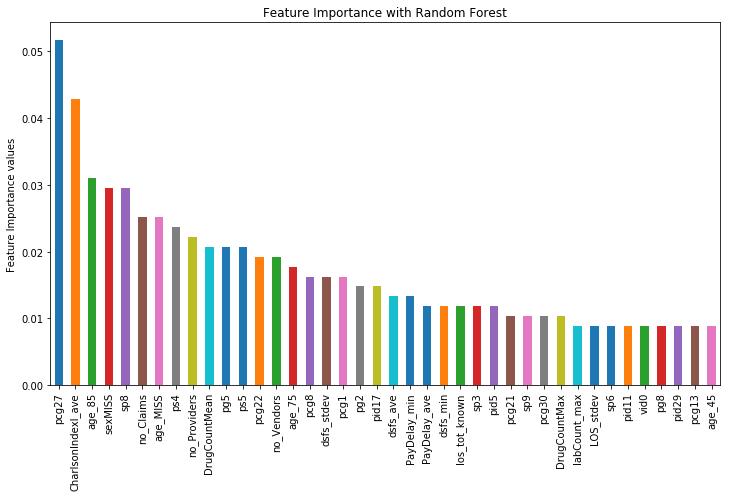

In [43]:
# Plot the top 40 important features
imp_feat_rf = pd.Series(XGregr.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)
imp_feat_rf[:40].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()

### Remove features with high correlation with no_Claims

In [44]:
list0=['no_Providers', 'no_Vendors', 'no_PCPs', 'no_PlaceSvcs','no_Claims',
       'no_Specialities', 'no_PrimaryConditionGroups', 'no_ProcedureGroups']

del list0[2]
list0

['no_Providers',
 'no_Vendors',
 'no_PlaceSvcs',
 'no_Claims',
 'no_Specialities',
 'no_PrimaryConditionGroups',
 'no_ProcedureGroups']

In [45]:
X_train_scaled.drop(list0,axis=1, inplace=True)
X_validation_scaled.drop(list0,axis=1, inplace=True)
X_test_scaled.drop(list0,axis=1, inplace=True)

year_2_data_scaled.drop(list0,axis=1, inplace=True)

In [46]:
XGregr.fit(X_train_scaled,logYtrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [47]:
logY_pred_test = XGregr .predict(X_test_scaled)
logY_pred_train = XGregr .predict(X_train_scaled)
logY_pred_validation = XGregr .predict(X_validation_scaled)

#RMSLE after truncated
#truncated output
logY_pred_test[logY_pred_test < 0]=0
logY_pred_train[logY_pred_train < 0]=0
logY_pred_validation[logY_pred_validation < 0]=0

print('error on training set: ', rmse(logYtrain, logY_pred_train),
     'error on validation set: ', rmse(logYvalidation, logY_pred_validation),
      'error on testing set: ', rmse(logYtest, logY_pred_test)
    )

error on training set:  0.45051341699539793 error on validation set:  0.46397153280128445 error on testing set:  0.44906710372969416


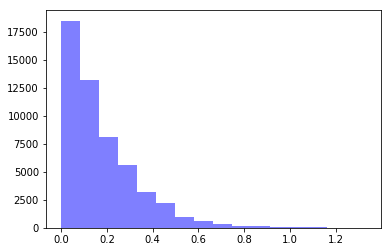

In [48]:
num_bins=16
n, bins, patches = plt.hist(logY_pred_train, num_bins, facecolor='blue', alpha=0.5)
plt.show()

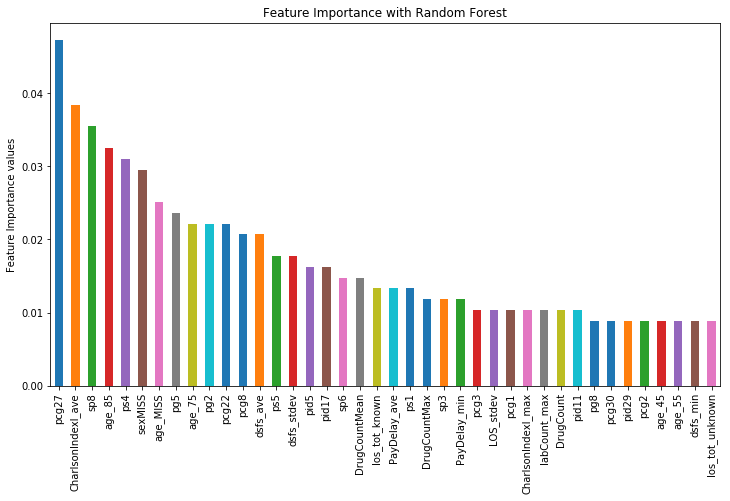

In [49]:
# Plot the top 40 important features
imp_feat_rf = pd.Series(XGregr.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)
imp_feat_rf[:40].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.savefig('FeatImportance.png')
plt.show()

### remove all features with 0 important value



In [50]:
#remove all features with 0 important value
list1=list()
for indx, val in imp_feat_rf.iteritems():
    if val==0:
        list1.append(indx)
pd.DataFrame(list1).to_csv("Data/RmvSet1_XGBregr.csv", encoding='utf-8')

In [51]:
X_train_scaled.drop(list1,axis=1, inplace=True)
X_validation_scaled.drop(list1,axis=1, inplace=True)
X_test_scaled.drop(list1,axis=1, inplace=True)
year_2_data_scaled.drop(list1,axis=1, inplace=True)

In [52]:
XGregr.fit(X_train_scaled,logYtrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [53]:
logY_pred_test = XGregr .predict(X_test_scaled)
logY_pred_train = XGregr .predict(X_train_scaled)
logY_pred_validation = XGregr .predict(X_validation_scaled)

#RMSLE after truncated
#truncated output
logY_pred_test[logY_pred_test < 0]=0
logY_pred_train[logY_pred_train < 0]=0
logY_pred_validation[logY_pred_validation < 0]=0

print('error on training set: ', rmse(logYtrain, logY_pred_train),
     'error on validation set: ', rmse(logYvalidation, logY_pred_validation),
      'error on testing set: ', rmse(logYtest, logY_pred_test)
    )

error on training set:  0.45051341699539793 error on validation set:  0.46397153280128445 error on testing set:  0.44906710372969416


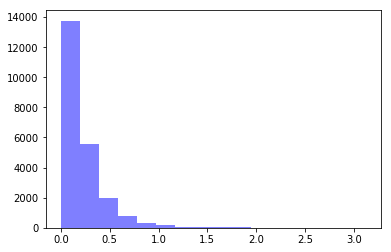

In [54]:
num_bins=16
n, bins, patches = plt.hist(np.exp(logY_pred_validation)-1, num_bins, facecolor='blue', alpha=0.5)
plt.show()

### Export predict output

In [32]:
logY2_pred=XGregr.predict(year_2_data_scaled)
logY2_pred[logY2_pred < 0]=0

#convert to original 
Y2_pred=np.exp(logY2_pred)-1
Y3_pred=np.exp(logY_pred_test)-1

Y2_pred= pd.DataFrame(Y2_pred, columns=['Y_pred_XGBregr_scaled'])
Y3_pred= pd.DataFrame(Y3_pred, columns=['Y_pred_XGBregr_scaled'])
#Y_pred_validation= pd.DataFrame(Y_pred_validation, columns=['Y_pred_LGBM'])

pd.DataFrame(Y2_pred).to_csv("Data/Y2_pred_XGBregr_scaled.csv", encoding='utf-8')
#pd.DataFrame(Y_pred_validation).to_csv("Data/Y_pred_validation_LGBM.csv", encoding='utf-8')
pd.DataFrame(Y3_pred).to_csv("Data/Y3_pred_XGBregr_scaled.csv", encoding='utf-8')

## Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

In [ ]:
def rmsle(logY_pred,logY_act):
    rms=sqrt(mean_squared_error(logY_pred, logY_act))
    return rms

my_scorer = make_scorer(rmsle, greater_is_better=False)

In [ ]:
from timeit import default_timer as timer

hyper_space_XGB = {'n_estimators': list(range(100, 1000)),
                   'boosting_type': ['gbdt', 'dart', 'goss'],
                   'max_depth':  list(range(2, 25)),
                   'num_leaves': list(range(30, 250)),
                   'subsample': list(np.linspace(0.3, 0.9, 30)),
                   'colsample_bytree': list(np.linspace(0.3, 0.9, 30)),
                   'learning_rate': np.logspace(np.log(0.003), np.log(0.1), base=np.exp(1), num=50),
                   'reg_alpha': list(np.linspace(0, 1)),
                   'reg_lambda': list(np.linspace(0, 1)),
                   'min_child_samples': list(range(20, 500, 5)),
                   'min_child_weight': list(np.linspace(0.0005, 0.005))
              }
start = timer()
est = XGBRegressor(n_jobs=-1, random_state=42, verbose=1, objective='reg:linear')
rs = RandomizedSearchCV(est, hyper_space_XGB, scoring=my_scorer, n_iter=50, cv=3, verbose=1, random_state=42)  # 
rs_results = rs.fit(X_train_scaled, Ytrain)
print("BEST PARAMETERS: " + str(rs_results.best_params_))
print("BEST CV SCORE: " + str(1 - rs_results.best_score_))
end = timer()
# Predict (after fitting RandomizedSearchCV is an estimator with best parameters)
Y_pred_validation = rs.predict(X_validation_scaled)

# Score
score = rmsle(Y_pred_validation, Yvalidation)
print("RMSLE SCORE ON VALIDATION DATA: {}".format(score))
print("ELAPSED TIME: " + str((end-start) / 60))

In [ ]:
paramGrid = {
    'scale_pos_weight':[0.001, 0.01,0.1]
}

In [ ]:
fit_params={"early_stopping_rounds":42, 
            "eval_metric" : "rmse", 
            "eval_set" : [[X_validation_scaled, logYvalidation]]}

gridsearch = GridSearchCV(XGregr, paramGrid, verbose=1 ,
         fit_params=fit_params,cv=2)
    
gridsearch.fit(X_train_scaled,logYtrain)

In [ ]:
gridsearch.best_params_